In [9]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [10]:
df = pd.read_csv('data/data_final.csv', low_memory=False)
X = df.drop(columns=['took_trip', 'estimated_distance'])
y = df['took_trip']
X.head()

,original_cost,rider_profile_rating,estimated_eta,discount,yassir2driver,driver2yassir,request_hour,request_day_of_week,request_month,acceptance_rate_monday,acceptance_rate_tuesday,acceptance_rate_wednesday,acceptance_rate_thursday,acceptance_rate_friday,acceptance_rate_saturday,acceptance_rate_sunday,acceptance_rate,acceptance_count
0,-0.499668,4.7,285.0,0.25,0.833333,-0.504854,12,2,2,0.089947,0.093333,0.062827,0.126667,0.116959,0.110169,0.101190,0.098505,112
1,-0.499668,4.7,285.0,0.25,0.833333,-0.504854,12,2,2,0.146341,0.147541,0.142857,0.222222,0.190476,0.269841,0.154930,0.181118,94
2,-0.499668,4.7,285.0,0.25,0.833333,-0.504854,12,2,2,0.454545,0.363636,0.500000,0.600000,0.900000,0.769231,0.500000,0.586207,51
3,0.074419,5.0,869.0,0.30,3.083333,-0.504854,12,4,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.074419,5.0,869.0,0.30,3.083333,-0.504854,12,4,7,0.205128,0.190083,0.204082,0.168539,0.134328,0.181818,0.108434,0.173077,108


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
import xgboost as xgb
from xgboost import XGBClassifier

In [13]:
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)
model.fit(X_train, y_train)

/opt/anaconda3/envs/ai/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:06:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [14]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

# Full classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8637478461992207
Precision: 0.8609203296703297
Recall: 0.44664172456796725
F1 Score: 0.5881524926686217
AUC-ROC: 0.8854666669162861
              precision    recall  f1-score   support

           0       0.86      0.98      0.92    100777
           1       0.86      0.45      0.59     28065

    accuracy                           0.86    128842
   macro avg       0.86      0.71      0.75    128842
weighted avg       0.86      0.86      0.85    128842



In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [ 7, 9, 11],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False),
                           param_grid=param_grid,
                           scoring='accuracy',  # You can use 'roc_auc' or 'log_loss' depending on the goal
                           n_jobs=-1,  # Use all available CPUs
                           cv=5,  # Cross-validation fold
                           verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/opt/anaconda3/envs/ai/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:06:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/ai/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:06:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/ai/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:06:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/ai/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:06:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/ana

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.9}


In [17]:
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=9,
    subsample=0.9,
    colsample_bytree = 1.0
)
model.fit(X_train, y_train)

/opt/anaconda3/envs/ai/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:42:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [18]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

# Full classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8738998152776268
Precision: 0.8150122614351211
Recall: 0.544735435595938
F1 Score: 0.6530124084317537
AUC-ROC: 0.9183713299489088
              precision    recall  f1-score   support

           0       0.88      0.97      0.92    100777
           1       0.82      0.54      0.65     28065

    accuracy                           0.87    128842
   macro avg       0.85      0.76      0.79    128842
weighted avg       0.87      0.87      0.86    128842



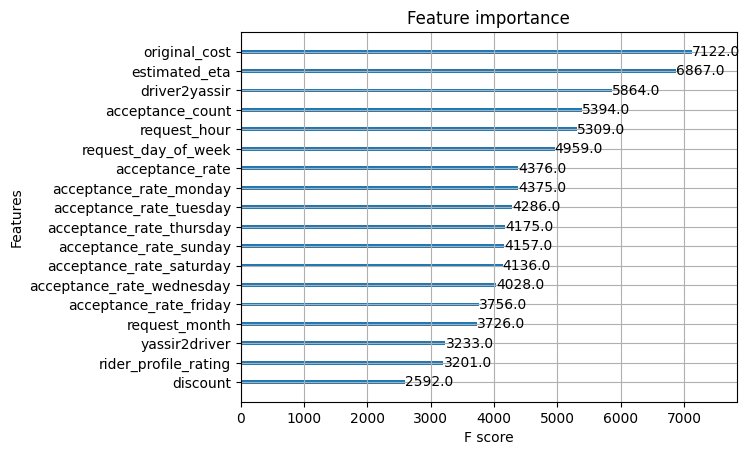

In [20]:
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.show()

In [21]:
model.save_model('xgboost_model.json')